                              DATA VIZUALIZATION

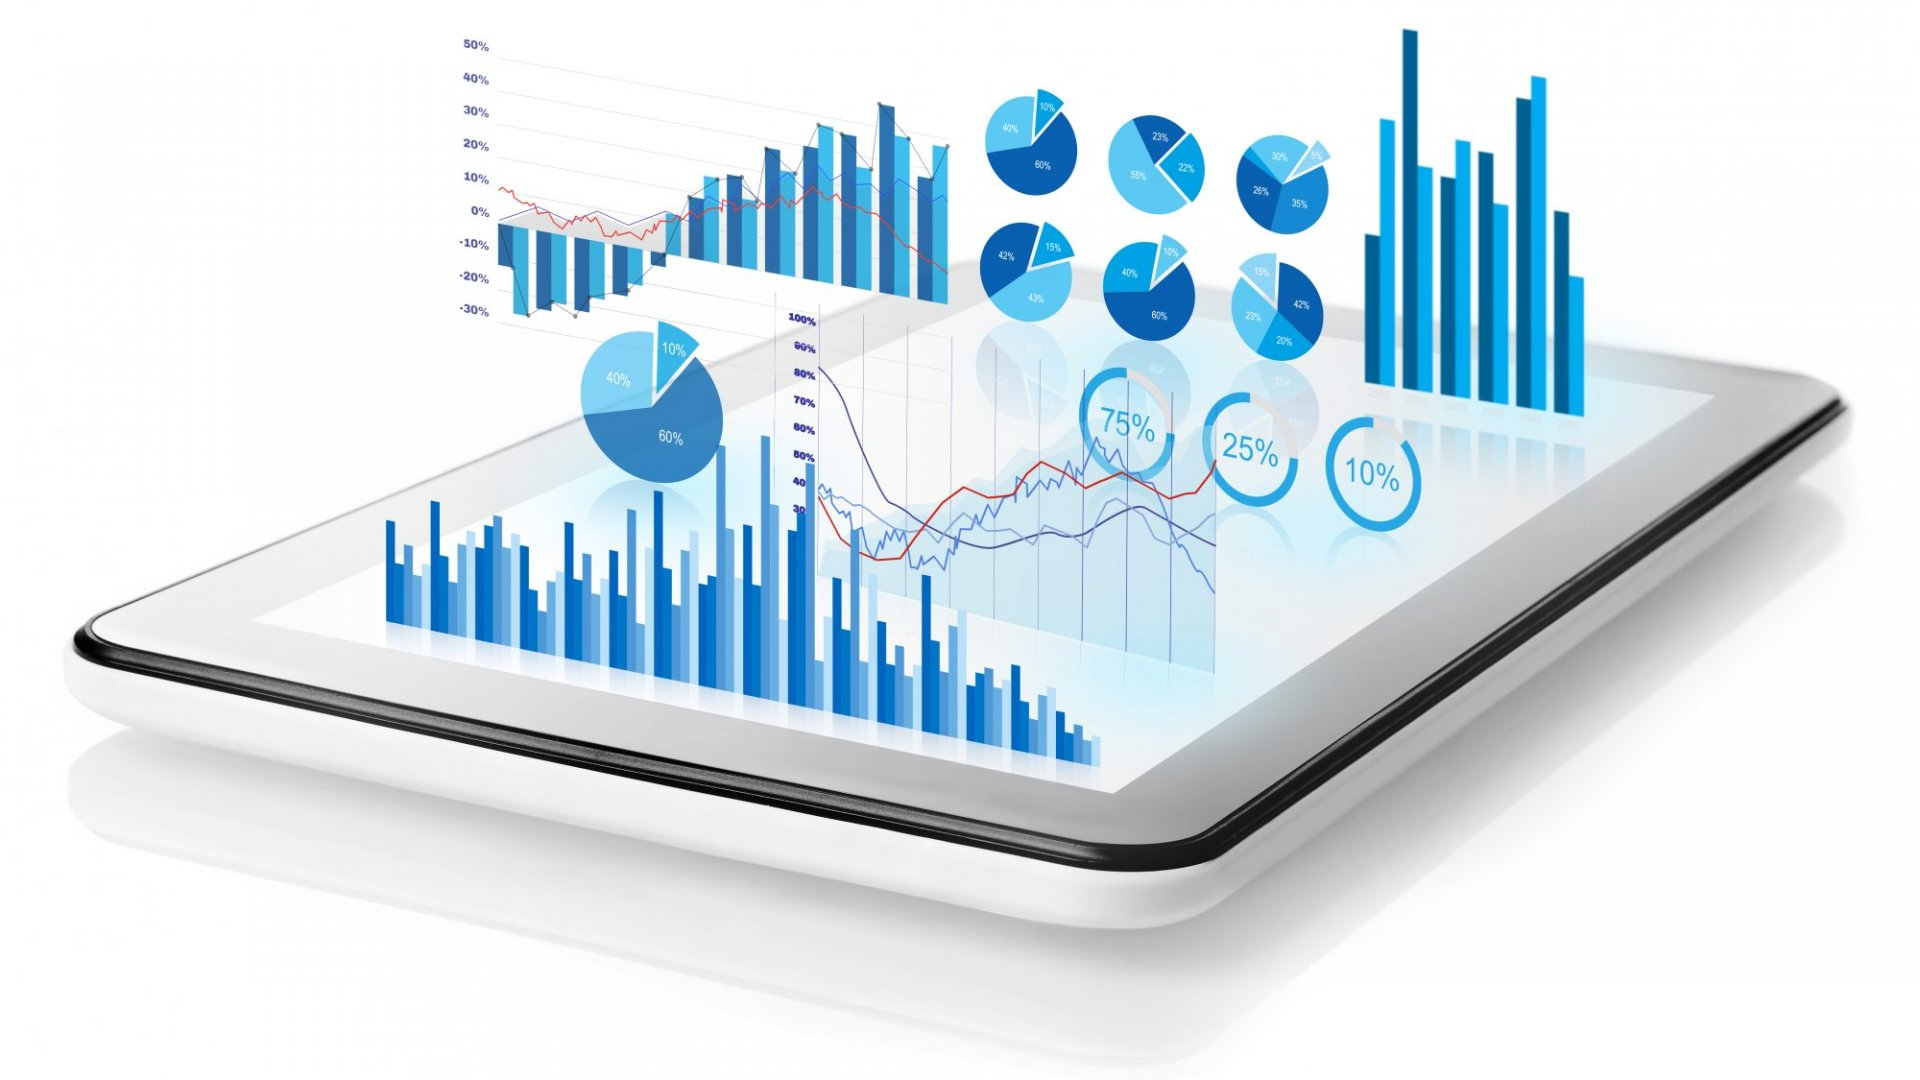

**Initial data analysis (IDA) has been described as part of “the rest of the iceberg that may sink science” in contrast with the much more often discussed P value as the “tip of the iceberg.”1 As much as 80% of the time allocated to the statistical analysis process is spent on data cleaning and preparation2, 3; however, these first steps in the analysis of data are often neglected or disorganized,4 and decisions made during these steps, such as changing the methods used or the outcomes measured, are often unreported.5, 6 In a study that compared protocols with published articles for randomized trials, at least 1 primary outcome was changed, introduced, or omitted in 62% of the studies examined.6 Some of these changes may be due to the discovery of data properties that do not agree with the expectations or requirements of the analysis plan. To prevent false-positive results, a systematic approach to initial data analysis and its reporting is needed**

In [34]:
import numpy as np
import pandas as pd
import seaborn as sb
import os

In [35]:
df=pd.read_csv("students.csv")

In [69]:
df

,ID,Age,Is_Married,Has_Children,Children_Count,Home_Distance,Drinks_Tea,Lectures_Missed,Average_Assignments_Score,Exam_Result
0,S1,41,1,1,3,23,0,1,41,1
1,S2,37,0,0,0,5,1,8,75,1
2,S3,49,0,0,0,44,1,9,52,1
3,S4,24,0,0,0,40,1,1,54,1
4,S5,48,1,1,3,36,0,2,32,1
...,...,...,...,...,...,...,...,...,...,...
995,S996,32,0,0,0,2,1,9,48,0
996,S997,29,1,0,0,22,0,10,56,0
997,S998,47,1,0,0,13,0,10,64,1
998,S999,21,0,0,0,15,0,4,75,1


File Summary:
The Student_Data.csv file should contain all currently enrolled students. This ﬁle contains basic data about the student such as id, age, and has children.

Data Field Details:
Student ID - The Student ID field should be unique and is used to map information and data files.
Preferred id- The Preferred id ﬁeld is required and is the id by which a student prefers to be known. For instance, if his ﬁrst id was 99, but he preferred 78, you would enter 78r in this ﬁeld. 

AGE: LET TO KNOW ABOUT THE AGE

Is_Married: about the maratial status about the student

Has_Children: that the student has child or not

Children_Count: count the no. of children

Home_Distance: the distance between from home to school/college

Average_Assignments_Score:their assignment score to mark about the students that they are doing well or not

Exam_Result: and the final result about them,which is evaluated on the basis of their assignment marks

some more fields are also available here such like 	Drinks_Tea	Lectures_Missed which tells that they like to drink tea and they missed the lecture or not


we have to work on this dataset.



In [36]:
df

,ID,Age,Is_Married,Has_Children,Children_Count,Home_Distance,Drinks_Tea,Lectures_Missed,Average_Assignments_Score,Exam_Result
0,S1,41,1,1,3,23,0,1,41,1
1,S2,37,0,0,0,5,1,8,75,1
2,S3,49,0,0,0,44,1,9,52,1
3,S4,24,0,0,0,40,1,1,54,1
4,S5,48,1,1,3,36,0,2,32,1
...,...,...,...,...,...,...,...,...,...,...
995,S996,32,0,0,0,2,1,9,48,0
996,S997,29,1,0,0,22,0,10,56,0
997,S998,47,1,0,0,13,0,10,64,1
998,S999,21,0,0,0,15,0,4,75,1


In [37]:
df.isnull().sum()

ID                           0
Age                          0
Is_Married                   0
Has_Children                 0
Children_Count               0
Home_Distance                0
Drinks_Tea                   0
Lectures_Missed              0
Average_Assignments_Score    0
Exam_Result                  0
dtype: int64

step1: DETECTING NA N/A na values


In [38]:
misssing_value=["N/A","na",np.nan]
df=pd.read_csv("students.csv",na_values=misssing_value)

In [39]:
df.isnull().sum()

ID                           0
Age                          0
Is_Married                   0
Has_Children                 0
Children_Count               0
Home_Distance                0
Drinks_Tea                   0
Lectures_Missed              0
Average_Assignments_Score    0
Exam_Result                  0
dtype: int64

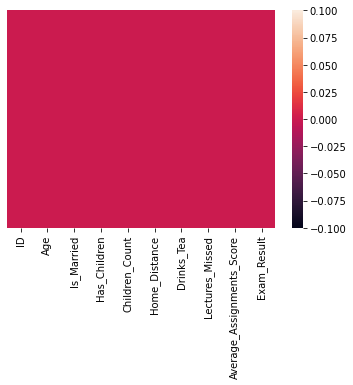

In [40]:
sns.heatmap(df.isnull(),yticklabels=False)

#now the data set is correct

step2: lets remove the na values

In [41]:
df.dropna(how='all')

,ID,Age,Is_Married,Has_Children,Children_Count,Home_Distance,Drinks_Tea,Lectures_Missed,Average_Assignments_Score,Exam_Result
0,S1,41,1,1,3,23,0,1,41,1
1,S2,37,0,0,0,5,1,8,75,1
2,S3,49,0,0,0,44,1,9,52,1
3,S4,24,0,0,0,40,1,1,54,1
4,S5,48,1,1,3,36,0,2,32,1
...,...,...,...,...,...,...,...,...,...,...
995,S996,32,0,0,0,2,1,9,48,0
996,S997,29,1,0,0,22,0,10,56,0
997,S998,47,1,0,0,13,0,10,64,1
998,S999,21,0,0,0,15,0,4,75,1


lets try to understand wih the set of a example that to do that is their is a presence of a na values

In [42]:
d10=pd.DataFrame(data={
    "s_id":[1,np.nan,10,23,12,np.nan],
    "marks":[82,np.nan,23,90,98,76]

})

In [43]:
d10

,s_id,marks
0,1.0,82.0
1,NaN,NaN
2,10.0,23.0
3,23.0,90.0
4,12.0,98.0
5,NaN,76.0


In [44]:
d10.dropna()

,s_id,marks
0,1.0,82.0
2,10.0,23.0
3,23.0,90.0
4,12.0,98.0


In [45]:

d10.dropna(how="all")

,s_id,marks
0,1.0,82.0
2,10.0,23.0
3,23.0,90.0
4,12.0,98.0
5,NaN,76.0


In [46]:

df.fillna(0)

,ID,Age,Is_Married,Has_Children,Children_Count,Home_Distance,Drinks_Tea,Lectures_Missed,Average_Assignments_Score,Exam_Result
0,S1,41,1,1,3,23,0,1,41,1
1,S2,37,0,0,0,5,1,8,75,1
2,S3,49,0,0,0,44,1,9,52,1
3,S4,24,0,0,0,40,1,1,54,1
4,S5,48,1,1,3,36,0,2,32,1
...,...,...,...,...,...,...,...,...,...,...
995,S996,32,0,0,0,2,1,9,48,0
996,S997,29,1,0,0,22,0,10,56,0
997,S998,47,1,0,0,13,0,10,64,1
998,S999,21,0,0,0,15,0,4,75,1


In [47]:
d10.fillna(method='ffill')

,s_id,marks
0,1.0,82.0
1,1.0,82.0
2,10.0,23.0
3,23.0,90.0
4,12.0,98.0
5,12.0,76.0


In [48]:
d10.fillna(method='bfill')

,s_id,marks
0,1.0,82.0
1,10.0,23.0
2,10.0,23.0
3,23.0,90.0
4,12.0,98.0
5,NaN,76.0


In [49]:
df.interpolate()

,ID,Age,Is_Married,Has_Children,Children_Count,Home_Distance,Drinks_Tea,Lectures_Missed,Average_Assignments_Score,Exam_Result
0,S1,41,1,1,3,23,0,1,41,1
1,S2,37,0,0,0,5,1,8,75,1
2,S3,49,0,0,0,44,1,9,52,1
3,S4,24,0,0,0,40,1,1,54,1
4,S5,48,1,1,3,36,0,2,32,1
...,...,...,...,...,...,...,...,...,...,...
995,S996,32,0,0,0,2,1,9,48,0
996,S997,29,1,0,0,22,0,10,56,0
997,S998,47,1,0,0,13,0,10,64,1
998,S999,21,0,0,0,15,0,4,75,1


In [50]:
df

,ID,Age,Is_Married,Has_Children,Children_Count,Home_Distance,Drinks_Tea,Lectures_Missed,Average_Assignments_Score,Exam_Result
0,S1,41,1,1,3,23,0,1,41,1
1,S2,37,0,0,0,5,1,8,75,1
2,S3,49,0,0,0,44,1,9,52,1
3,S4,24,0,0,0,40,1,1,54,1
4,S5,48,1,1,3,36,0,2,32,1
...,...,...,...,...,...,...,...,...,...,...
995,S996,32,0,0,0,2,1,9,48,0
996,S997,29,1,0,0,22,0,10,56,0
997,S998,47,1,0,0,13,0,10,64,1
998,S999,21,0,0,0,15,0,4,75,1


In [24]:
df

,ID,Age,Is_Married,Has_Children,Children_Count,Home_Distance,Drinks_Tea,Lectures_Missed,Average_Assignments_Score,Exam_Result
0,S1,41,1,1,3,23,0,1,41,1
1,S2,37,0,0,0,5,1,8,75,1
2,S3,49,0,0,0,44,1,9,52,1
3,S4,24,0,0,0,40,1,1,54,1
4,S5,48,1,1,3,36,0,2,32,1
...,...,...,...,...,...,...,...,...,...,...
995,S996,32,0,0,0,2,1,9,48,0
996,S997,29,1,0,0,22,0,10,56,0
997,S998,47,1,0,0,13,0,10,64,1
998,S999,21,0,0,0,15,0,4,75,1


In [26]:
#example 
df.fillna({
    'age':99
    
})

,ID,Age,Is_Married,Has_Children,Children_Count,Home_Distance,Drinks_Tea,Lectures_Missed,Average_Assignments_Score,Exam_Result
0,S1,41,1,1,3,23,0,1,41,1
1,S2,37,0,0,0,5,1,8,75,1
2,S3,49,0,0,0,44,1,9,52,1
3,S4,24,0,0,0,40,1,1,54,1
4,S5,48,1,1,3,36,0,2,32,1
...,...,...,...,...,...,...,...,...,...,...
995,S996,32,0,0,0,2,1,9,48,0
996,S997,29,1,0,0,22,0,10,56,0
997,S998,47,1,0,0,13,0,10,64,1
998,S999,21,0,0,0,15,0,4,75,1


In [27]:
df.head()

,ID,Age,Is_Married,Has_Children,Children_Count,Home_Distance,Drinks_Tea,Lectures_Missed,Average_Assignments_Score,Exam_Result
0,S1,41,1,1,3,23,0,1,41,1
1,S2,37,0,0,0,5,1,8,75,1
2,S3,49,0,0,0,44,1,9,52,1
3,S4,24,0,0,0,40,1,1,54,1
4,S5,48,1,1,3,36,0,2,32,1


In [51]:
df.nunique()

ID                           1000
Age                            31
Is_Married                      2
Has_Children                    2
Children_Count                 11
Home_Distance                  51
Drinks_Tea                      2
Lectures_Missed                11
Average_Assignments_Score      97
Exam_Result                     2
dtype: int64

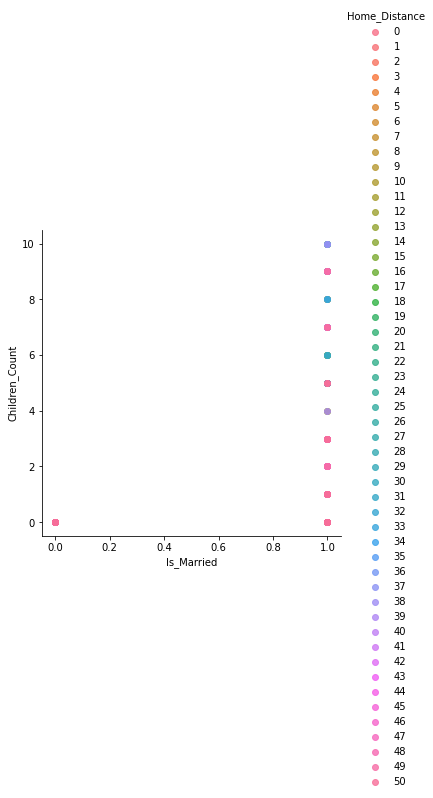

In [55]:
#sb.lmplot(x='Is_Married', y='Children_Count', data=df,fit_reg=False, hue='Home_Distance')

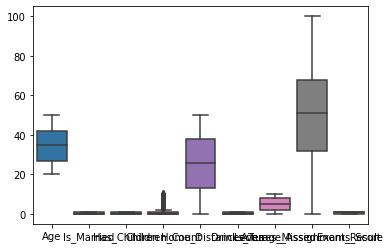

In [56]:
sb.boxplot(data=df)

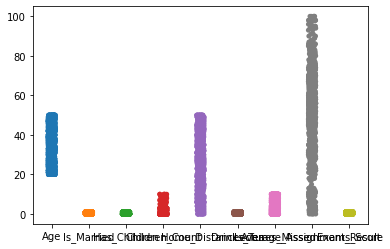

In [57]:
sb.stripplot(data=df)

In [58]:
df.describe()

,Age,Is_Married,Has_Children,Children_Count,Home_Distance,Drinks_Tea,Lectures_Missed,Average_Assignments_Score,Exam_Result
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000
mean,34.930000,0.489000,0.26400,0.803000,25.56400,0.496000,5.009000,49.059000,0.61800
std,8.995222,0.500129,0.44102,1.784201,14.54529,0.500234,3.164005,24.016668,0.48612
min,20.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
25%,27.000000,0.000000,0.00000,0.000000,13.00000,0.000000,2.000000,32.000000,0.00000
50%,35.000000,0.000000,0.00000,0.000000,26.00000,0.000000,5.000000,51.000000,1.00000
75%,42.000000,1.000000,1.00000,1.000000,38.00000,1.000000,8.000000,68.000000,1.00000
max,50.000000,1.000000,1.00000,10.000000,50.00000,1.000000,10.000000,100.000000,1.00000


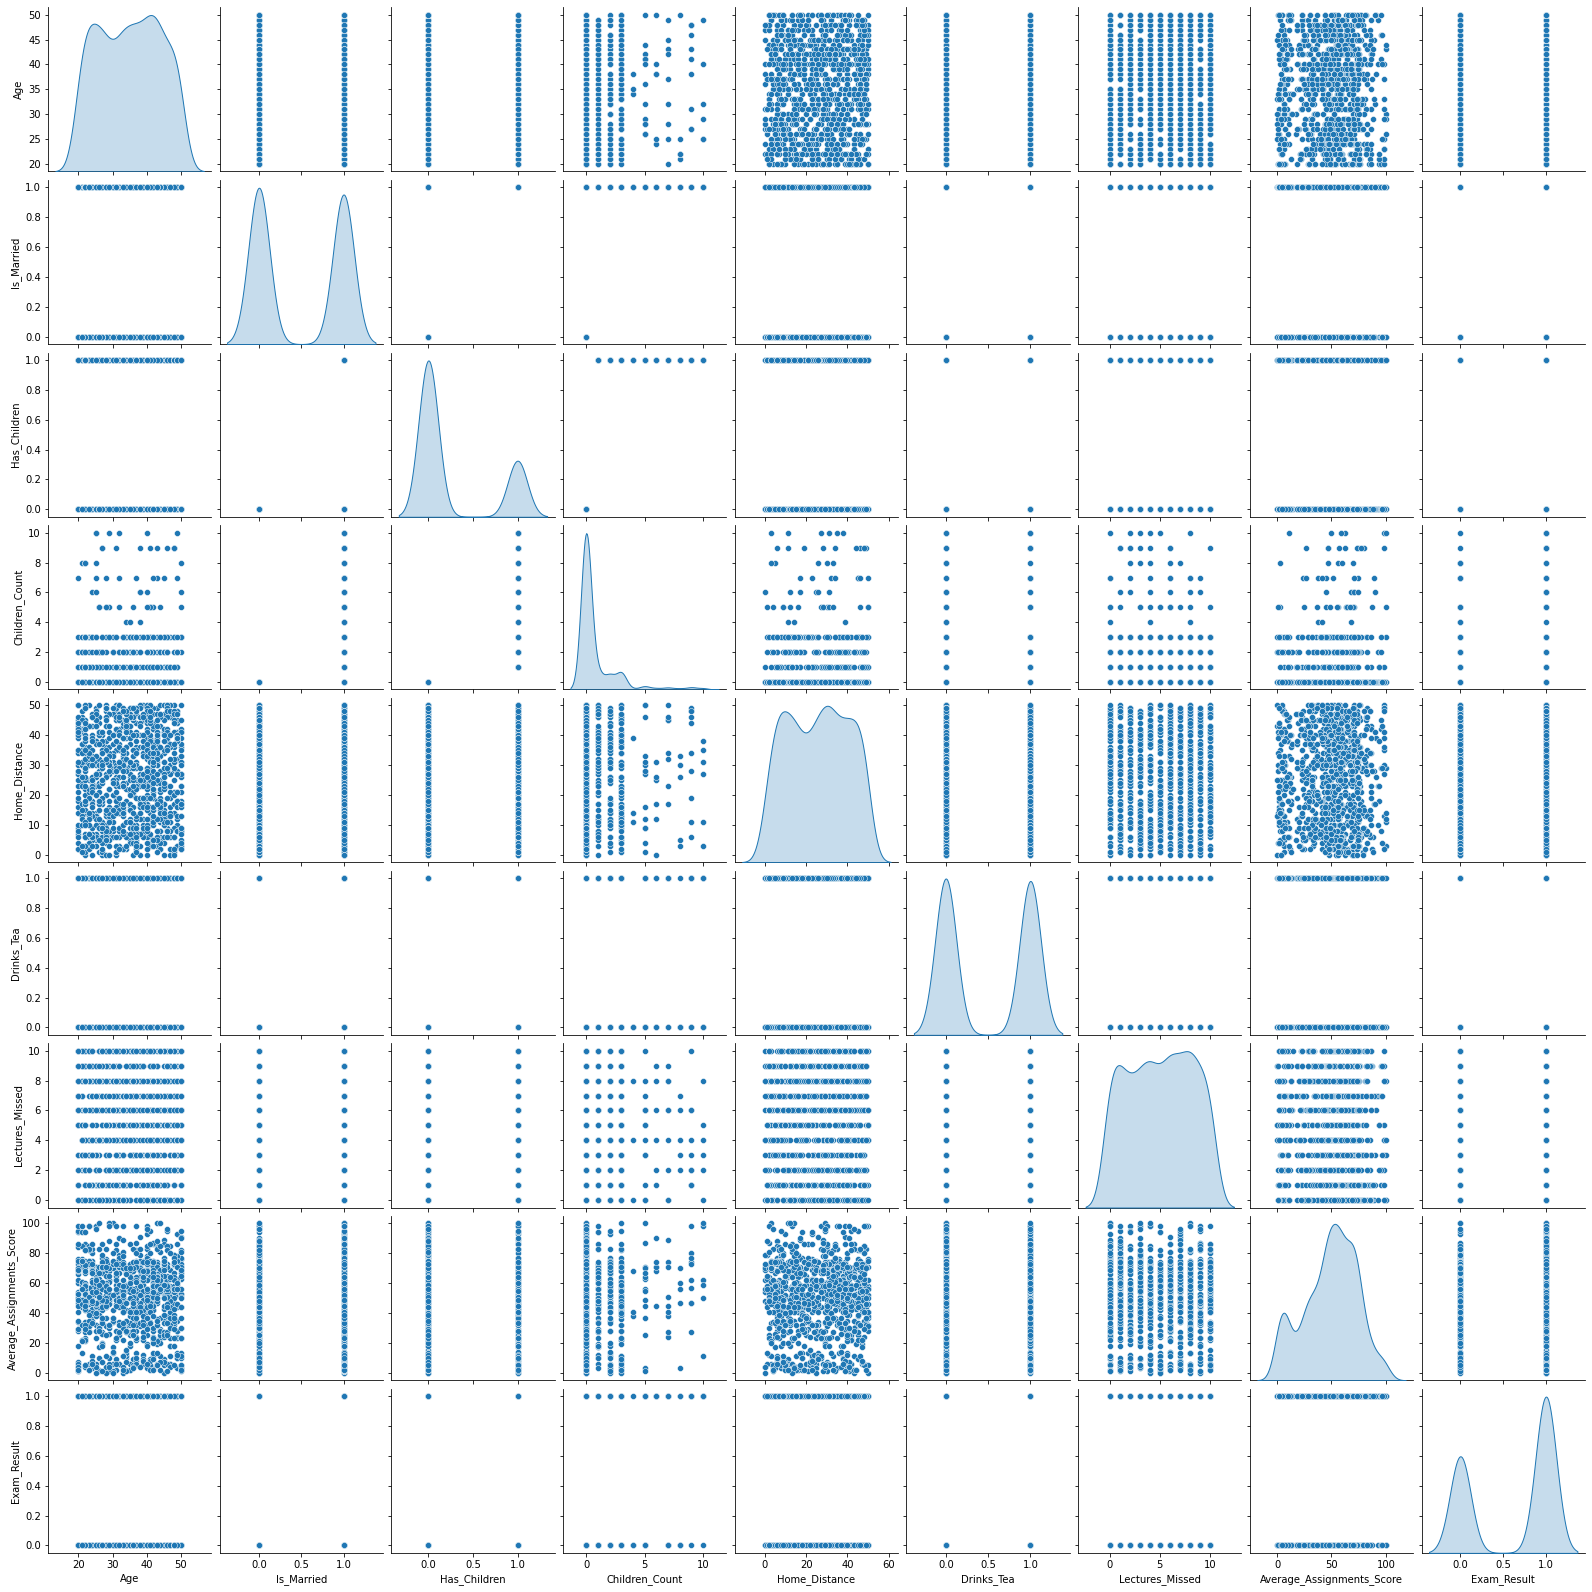

In [59]:
sb.pairplot(data=df, diag_kind='kde')

In [68]:
def df_info(df, include_unique_values=False):
    list_col_names = list(df.columns)
    list_col_types = [type(col) for col in df.iloc[0, :]]
    list_col_null_count = [df[col].isnull().sum() for col in list_col_names]
    list_col_unique_count = [df[col].nunique() for col in list_col_names]
    list_col_memory_usage = [df[col].memory_usage() for col in list_col_names]
    total_memory_usage = sum(list_col_memory_usage)  / 1048576    # to get mem usage in MB
    if include_unique_values:
        list_col_unique_items = [list(df[col].value_counts().to_dict().keys())[:20] for col in list_col_names]
        df_col_info = pd.DataFrame({'col_name': list_col_names,
                                    'col_type': list_col_types,
                                    'col_null_count': list_col_null_count,
                                    'col_unique_count': list_col_unique_count,
                                    'col_unique_items': list_col_unique_items})
    else:
        df_col_info = pd.DataFrame({'col_name': list_col_names,
                                    'col_type': list_col_types,
                                    'col_null_count': list_col_null_count,
                                    'col_unique_count': list_col_unique_count})
    return df_col_info, total_memory_usage

In [60]:
import matplotlib.pyplot as plt

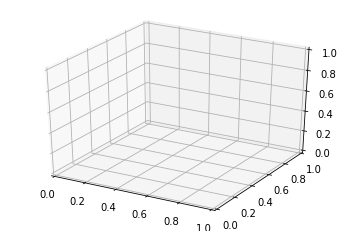

In [61]:
plt.axes(projection='3d')

In [63]:
df = pd.read_csv('students.csv', encoding='latin1')

Text(0.5, 0, 'status')

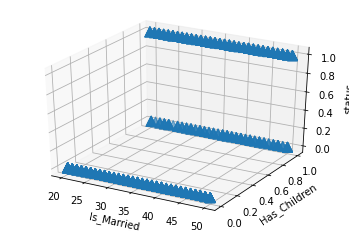

In [64]:
std_axis = plt.axes(projection='3d')
std_axis.scatter3D(df.Age, df.Is_Married, df.Has_Children, marker='^', s=100)
std_axis.set_xlabel('Is_Married')
std_axis.set_ylabel('Has_Children')
std_axis.set_zlabel('status')

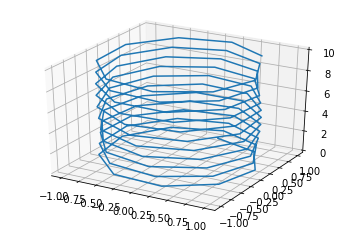

In [65]:
spiral_count = 7
z_data = np.linspace(0, 10, 100)
y_data = np.cos(spiral_count * z_data)
x_data = np.sin(spiral_count * z_data)
spiral_axis = plt.axes(projection='3d')
spiral_axis.plot3D(x_data, y_data, z_data)

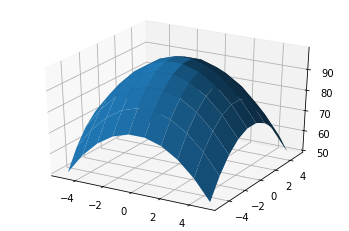

In [66]:
data_count = 10

x_data = np.linspace(-5, 5, data_count)
y_data = np.linspace(-5, 5, data_count)
X, Y = np.meshgrid(x_data, y_data)
Z = 100 - (X** 2 + Y**2)
surface_axis = plt.axes(projection='3d')
surface_axis.plot_surface(X, Y, Z)

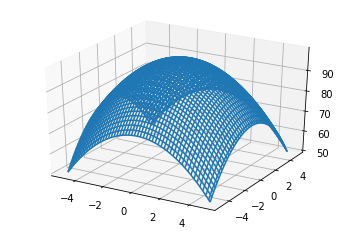

In [67]:
data_count = 100

x_data = np.linspace(-5, 5, data_count)
y_data = np.linspace(-5, 5, data_count)
X, Y = np.meshgrid(x_data, y_data)
Z = 100 - (X** 2 + Y**2)
wireframe_axis = plt.axes(projection='3d')
wireframe_axis.plot_wireframe(X, Y, Z)

Data cleansing is essential to valid, powerful analysis, yet for many companies it’s a manual, siloed process that wastes time and resources. Analytics automation allows for repeatable, scalable, accessible data cleansing and enables:

The democratization of data and analytics
The automation of business processes
The upskilling of people for quick wins and transformative outcomes
Data cleansing is the foundation of analytics automation, and with that strong foundation, companies have a clear path to deeper analysis with data science and machine learning.